**Integrantes**
+ Edwin Perez
+ Laura Cuartas 
+ Daniela Torres 

In [ ]:
from sympy import MatrixSymbol, Matrix, Identity
!pip install control
import sympy as sym
import pandas as pd

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 KB 7.8 MB/s eta 0:00:00


In [ ]:
N = 100
t = np.linspace(0,10,N)
#N =10
#t = np.linspace(0,10,N)

In [ ]:
#p = [5, 4, 3, 2, 1]
#y = np.polyval(p,t)
y_x = np.sin(t+1)
e = np.random.normal(0,0.1,size=N)
## Señal con error incluido
y = y_x + e

In [ ]:
data = pd.DataFrame(data = {'t':t,'y':y})
data['ones'] = 1
data

,t,y,ones
0,0.00000,0.977323,1
1,0.10101,1.012324,1
2,0.20202,1.008790,1
3,0.30303,0.917329,1
4,0.40404,1.078770,1
...,...,...,...
95,9.59596,-1.002109,1
96,9.69697,-0.959363,1
97,9.79798,-1.062099,1
98,9.89899,-0.815801,1


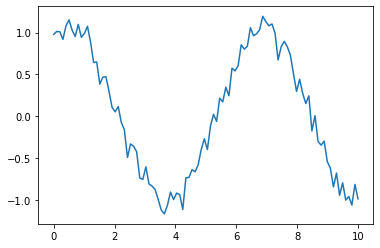

In [ ]:
plt.plot(t,y)

In [ ]:
orden = int(input("Digite el orden del polinomio que desea: "))
phi_v = []
for i in range(orden+1):
  for j in range(N):
    phi = (data.t[j]**(orden-i))
    #print("data.t[j]", data.t[j], "(orden-i)", (orden-i))
    phi_v.append(phi)
phi_v

Digite el orden del polinomio que desea: 15


[0.0, 1.162711802755614e-15, 3.809974035269596e-11, 1.668364352554266e-08, 1.2
484522918771412e-06, 3.548314827745408e-05, 0.0005466896310449818, 0.005520045
801918992, 0.04090928470023016, 0.23939204936916353, 1.1627118027556154, 4.856
935749618865, 17.913925830081965, 59.51444194206948, 180.88086083728152, 509.1
4439470039827, 1340.515441057142, 3328.173066470203, 7844.3986737287505, 17651
.2755767677, 38099.740352696004, 79206.62384747597, 159152.07064351096, 310019
.9353049698, 587003.5216001258, 1082859.749678162, 1950169.2335577328, 3435014
.252937534, 5927104.047916041, 10033259.605038334, 16683643.52554265, 27283337
.072670497, 43926009.97256043, 69691719.37625638, 109057575.04209562, 16845842
9.01364118, 257045255.7407437, 387701911.3323869, 578396998.099524, 853967192.
5836543, 1248452291.8771427, 1808131165.2860262, 2595442650.2340927, 369401721
2.4983797, 5215095050.846567, 7305665569.127297, 10158733240.07325, 1402619750
8.251314, 19234931395.792923, 26206756982.313072, 35

In [ ]:
sub_lista = np.array_split(phi_v, orden+1)
sub_lista .reverse()
#sub_lista 

In [ ]:
phi = np.array(sub_lista).transpose()
#phi

In [ ]:
A = np.dot(phi.transpose(),phi)
Mpr = np.linalg.inv(A)
#Mpr

In [ ]:
B = np.dot(phi.transpose(),y)
theta = np.dot(Mpr,B)
theta

array([-1.10104286e+01,  9.93276548e+00,  7.54353523e-01, -6.60890388e+00,
        5.92984772e+00, -2.94855404e+00,  9.07256603e-01, -1.73167467e-01,
        1.92705542e-02, -1.05740875e-03,  4.86517383e-05, -1.64559533e-05,
        3.18458660e-06, -2.89732384e-07,  1.30719329e-08, -2.38606135e-10])

In [ ]:
vector_invertido = theta[::-1]
vector_invertido

array([-2.38606135e-10,  1.30719329e-08, -2.89732384e-07,  3.18458660e-06,
       -1.64559533e-05,  4.86517383e-05, -1.05740875e-03,  1.92705542e-02,
       -1.73167467e-01,  9.07256603e-01, -2.94855404e+00,  5.92984772e+00,
       -6.60890388e+00,  7.54353523e-01,  9.93276548e+00, -1.10104286e+01])

In [ ]:
y_e = np.polyval(vector_invertido,t)

**Señal**

**Con un polinomio de orden = 2** 

---



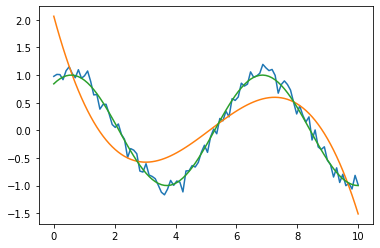

In [ ]:
plt.plot(t,y)
plt.plot(t,y_e)
plt.plot(t,y_x)

**Con polinomio de orden = 8**

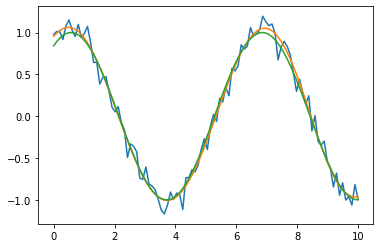

In [ ]:
plt.plot(t,y)
plt.plot(t,y_e)
plt.plot(t,y_x)

**Con polinomio de orden = 15**



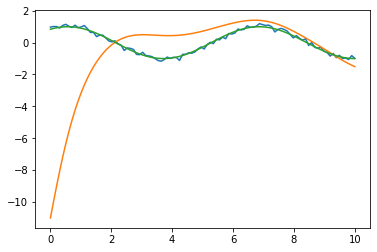

In [ ]:
plt.plot(t,y)
plt.plot(t,y_e)
plt.plot(t,y_x)

**Conclusiones**

Se puede concluir que el número de orden del polinomio utilizado en la regresión puede afectar significativamente los resultados de la regresión.

En general, el uso de un polinomio de orden superior permite que el modelo de regresión se ajuste mejor a los datos observados, ya que se pueden capturar patrones más complejos en los datos. Sin embargo, un polinomio de orden demasiado alto puede sobreajustar los datos y generar que no pueda generalizar bien a nuevos datos.

Por otro lado, el uso de un polinomio de orden bajo puede no ser suficiente para capturar la complejidad de los datos y puede llevar a una subestimación del modelo.

En conclusión, el número de orden del polinomio es un factor crítico en la regresión y debe ser seleccionado cuidadosamente para evitar el sobreajuste o la subestimación del modelo.